In [2]:
import sys
sys.path.append("/Users/luo/OneDrive/SAR-Altimetry/sentinel3-altimetry-l2/utils")
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
from osgeo import gdal
from rsimage.tiff_io import readTiff
from rsimage.imgShow import imgShow
from coor_convert import geo2imagexy
from ransac_filter import ransac_filter


In [2]:
root_dir = os.path.dirname(os.getcwd())
path_s3l2 = root_dir+'/test_data/s3a-relative-orbit-260&309/S3A_SR_2_WAT____20190121T021825_20190121T030242_20191218T104655_2657_040_260______MR1_R_NT_004.SEN3/enhanced_measurement_subs_preproc_mainproc.nc'
path_rsimg = root_dir+'/test_data/rs_image/greatbay_l8_img.tif'
path_result_final = root_dir+'/results/result_final_ocean.nc'
path_metrics_result = root_dir+'/results/metrics_result.nc'


In [3]:
## 1. data reading
img_gdal = gdal.Open(path_rsimg)
l8_img, im_geotrans,im_proj,im_row,im_col,im_bands = readTiff(path_rsimg)
s3_l2 = xr.open_dataset(path_s3l2)
metrics_result = xr.open_dataset(path_metrics_result)
result_final = xr.open_dataset(path_result_final)
# result_final


AttributeError: 'NoneType' object has no attribute 'RasterXSize'

## Waveform of the s3l2 product

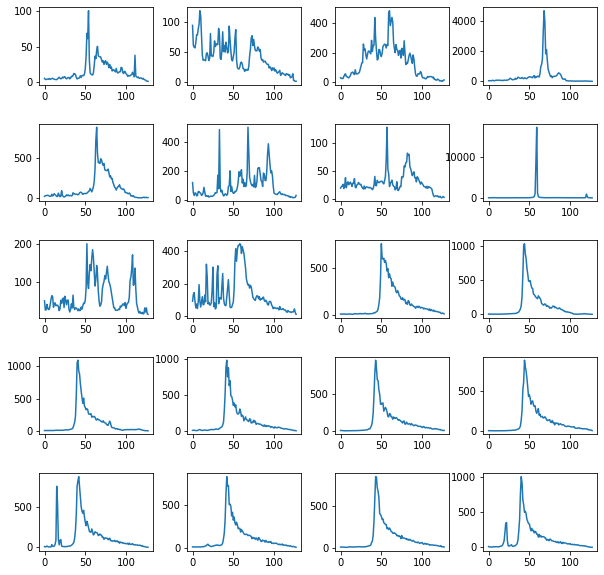

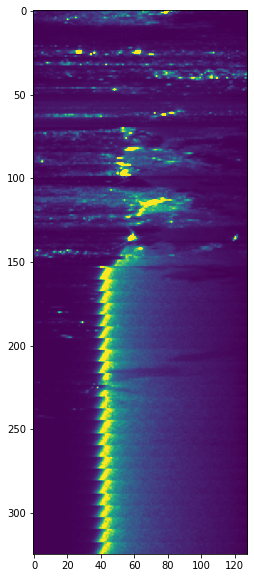

In [12]:
waveform_20_ku = s3_l2.variables["waveform_20_ku"]
fig = plt.figure(figsize=(10,10))
for i,ind in enumerate(range(100,200,5)):
    i +=1
    ax = plt.subplot(5,4,i)
    ax.plot(waveform_20_ku[ind])
plt.subplots_adjust(wspace=0.3, hspace=0.5)

fig_2 = plt.figure(figsize=(5,10))
plt.imshow(waveform_20_ku, vmin=0, vmax=800)


## Waveform of the final result

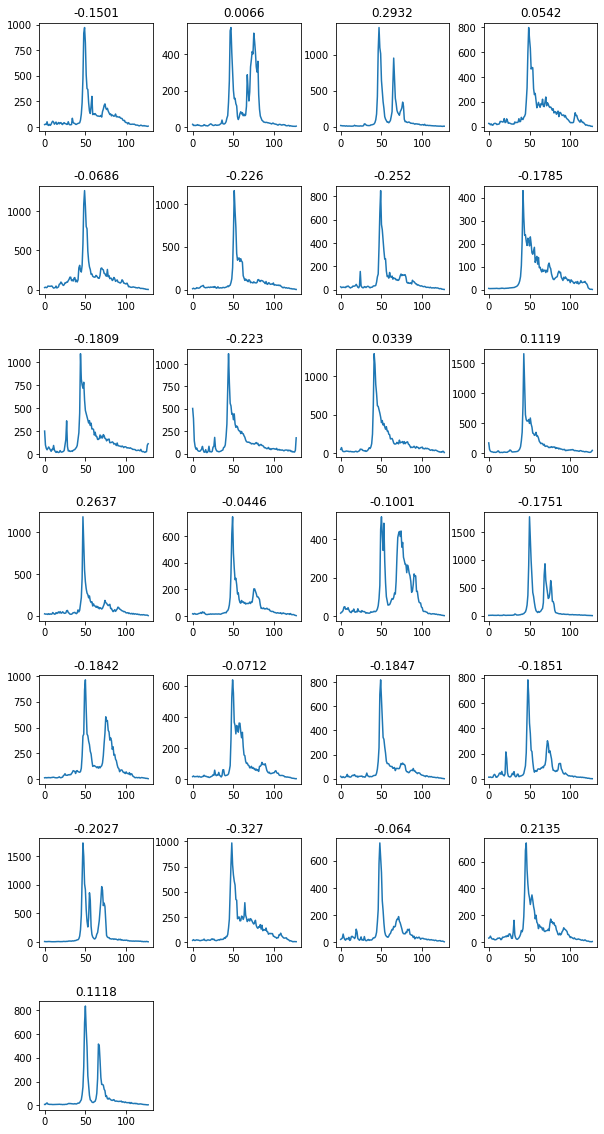

In [13]:
plt.figure(figsize=(10,20))
for i, ind in enumerate(range(1,50,2)):
    i +=1
    plt.subplot(7,4,i)
    plt.title(metrics_result['bias_ocean'][ind].values)
    plt.plot(result_final['waveform_20_ku'][ind].values)
plt.subplots_adjust(wspace=0.3, hspace=0.5)


## Waveform retrack epoch visualization

range_track: 804819.8470000001
range_retrack_samosa: 804818.7078
range_retrack_ocog: 804818.2193
dif_retrack_track: -1.1392000000923872
epoch_dis: -3.3941890518145685


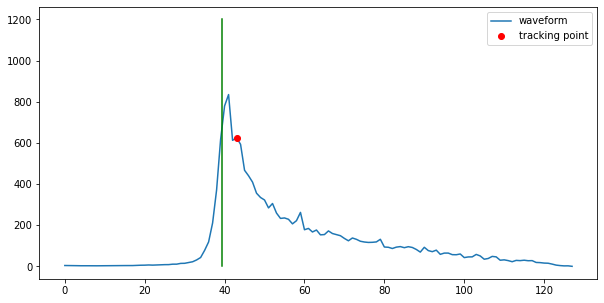

In [8]:
## show epoch correction on waveform
ind = 324
gate_time = 3.125e-9
c = 299792458
plt.figure(figsize=(10,5))
waveform = s3_l2['waveform_20_ku'][ind]
plt.plot(waveform, label='waveform')
plt.plot(43,waveform[43],'ro', label='tracking point')
epoch = s3_l2['epoch_ocean_20_ku'][ind]
range_track = s3_l2['tracker_range_20_ku'][ind]
range_retrack_samosa = s3_l2['range_ocean_20_ku'][ind]
range_retrack_ocog = s3_l2['range_ocog_20_ku'][ind]
dif_samosa_track = range_retrack_samosa - range_track
dif_ocog_track = range_retrack_ocog - range_track

plt.legend()
print('range_track:', float(range_track))
print('range_retrack_samosa:', float(range_retrack_samosa))
print('range_retrack_ocog:',float(range_retrack_ocog))
print('dif_retrack_track:', float(range_retrack_samosa-range_track))
print('epoch_dis:',float(epoch*c))
x = np.linspace(43+epoch/gate_time,43+epoch/gate_time,400)
y = np.linspace(0,1200,400)
plt.plot(x, y,'g', label='tracking point')
